In [2]:
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
import pandas as pd
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils
from utils import plots, get_batches, plot_confusion_matrix, get_data


from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

%matplotlib inline

pd.set_option('display.max_columns', 100)

Using cuDNN version 5103 on context None
Mapped name None to device cuda: Tesla K80 (0000:00:1E.0)
Using Theano backend.


In [3]:
PROJECT_DIR  = '/home/ubuntu/Extracting-food-preferences'
PICTURES_DIR = '/home/ubuntu/Extracting-food-preferences/classification_with_pics'

In [11]:
PROJECT_DIR  = 'C:\\Users\\Natalia\\Documents\\GitHub\\Extracting-food-preferences'
PICTURES_DIR = 'C:\\Users\\Natalia\\Documents\\GitHub\\Extracting-food-preferences\\classification_with_pics'

In [4]:
%cd $PROJECT_DIR

/home/ubuntu/Extracting-food-preferences


In [5]:
#import modules
from utils import *
from vgg16 import Vgg16
from datetime import datetime

In [6]:
%cd $PICTURES_DIR

#Set path to sample/ path if desired
path = PICTURES_DIR #+ '/sample'
#path = PICTURES_DIR + '\\' + 'sample\\'
results_path=path + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

model_path = path + '/models/'
if not os.path.exists(model_path): os.mkdir(model_path)

/home/ubuntu/Extracting-food-preferences/classification_with_pics


In [28]:
%cd $PICTURES_DIR

#Set path to sample/ path if desired
path = PICTURES_DIR + '\\sample\\'
#path = PICTURES_DIR + '\\' + 'sample\\'
results_path=path + '\\results\\'
train_path=path + '\\train\\'
valid_path=path + '\\valid\\'

model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics


In [7]:
#Set constants
batch_size=25
no_of_epochs=1

In [8]:
# Use batch size of 1 since we're just doing preprocessing on the CPU
val_batches = get_batches(path+'/valid', shuffle=False, batch_size=10)
batches     = get_batches(path+'/train', shuffle=False, batch_size=10)

Found 30000 images belonging to 2 classes.
Found 153087 images belonging to 2 classes.


In [8]:
batches.filenames[:10]

['popular/True.recipe-2264941361875331.jpg',
 'popular/True.recipe-1673431275337700.jpg',
 'popular/True.recipe-625411162842177.jpg',
 'popular/True.recipe-749771177511832.jpg',
 'popular/True.recipe-1865461302693227.jpg',
 'popular/True.recipe-392071126961424.jpg',
 'popular/True.recipe-3283861487776743.jpg',
 'popular/True.recipe-1061731211454533.jpg',
 'popular/True.recipe-95201037625652.jpg',
 'popular/True.recipe-1614271268657866.jpg']

In [9]:
#import Vgg16 
vgg = Vgg16()

In [9]:
val_classes = val_batches.classes
trn_classes = batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

In [11]:
#start = datetime.now()

#trn_features = vgg.predict_gen(batches)
#val_features = vgg.predict_gen(val_batches)

#end = datetime.now()
#total = end - start
#print('Time to run the script on GPU is {}'.format(total))

Time to run the script on GPU is 1:05:31.751143


In [13]:
#save_array(model_path+'train_lastlayer_features.bc', trn_features)
#save_array(model_path+'valid_lastlayer_features.bc', val_features)

In [10]:
start = datetime.now()

trn_features = load_array(model_path+'train_lastlayer_features.bc')
val_features = load_array(model_path+'valid_lastlayer_features.bc')

end = datetime.now()
total = end - start
print('Time to run the script on GPU is {}'.format(total))

Time to run the script on GPU is 0:00:06.825486


In [16]:
# 1000 inputs, since that's the saved features, and 2 outputs, for dog and cat
lm = Sequential([ Dense(2, activation='softmax', input_shape=(1000,)) ])
lm.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
batch_size=50000

In [18]:
history = lm.fit(trn_features, trn_labels, nb_epoch=500, batch_size=batch_size, 
       validation_data=(val_features, val_labels))

Train on 153087 samples, validate on 30000 samples
Epoch 1/500
153087/153087 [==============================] - 0s - loss: 0.6927 - acc: 0.5148 - val_loss: 0.6926 - val_acc: 0.5192
Epoch 2/500
153087/153087 [==============================] - 0s - loss: 0.6927 - acc: 0.5155 - val_loss: 0.6926 - val_acc: 0.5193
Epoch 3/500
153087/153087 [==============================] - 0s - loss: 0.6927 - acc: 0.5157 - val_loss: 0.6925 - val_acc: 0.5204
Epoch 4/500
153087/153087 [==============================] - 0s - loss: 0.6927 - acc: 0.5164 - val_loss: 0.6925 - val_acc: 0.5200
Epoch 5/500
153087/153087 [==============================] - 0s - loss: 0.6926 - acc: 0.5164 - val_loss: 0.6925 - val_acc: 0.5208
Epoch 6/500
153087/153087 [==============================] - 0s - loss: 0.6926 - acc: 0.5165 - val_loss: 0.6925 - val_acc: 0.5211
Epoch 7/500
153087/153087 [==============================] - 0s - loss: 0.6926 - acc: 0.5168 - val_loss: 0.6925 - val_acc: 0.5213
Epoch 8/500
153087/153087 [============

153087/153087 [==============================] - 0s - loss: 0.6919 - acc: 0.5266 - val_loss: 0.6918 - val_acc: 0.5311
Epoch 64/500
153087/153087 [==============================] - 0s - loss: 0.6919 - acc: 0.5274 - val_loss: 0.6918 - val_acc: 0.5310
Epoch 65/500
153087/153087 [==============================] - 0s - loss: 0.6919 - acc: 0.5279 - val_loss: 0.6918 - val_acc: 0.5316
Epoch 66/500
153087/153087 [==============================] - 0s - loss: 0.6919 - acc: 0.5282 - val_loss: 0.6918 - val_acc: 0.5322
Epoch 67/500
153087/153087 [==============================] - 0s - loss: 0.6919 - acc: 0.5284 - val_loss: 0.6917 - val_acc: 0.5318
Epoch 68/500
153087/153087 [==============================] - 0s - loss: 0.6919 - acc: 0.5288 - val_loss: 0.6917 - val_acc: 0.5321
Epoch 69/500
153087/153087 [==============================] - 0s - loss: 0.6919 - acc: 0.5287 - val_loss: 0.6917 - val_acc: 0.5326
Epoch 70/500
153087/153087 [==============================] - 0s - loss: 0.6918 - acc: 0.5288 - 

153087/153087 [==============================] - 0s - loss: 0.6913 - acc: 0.5337 - val_loss: 0.6912 - val_acc: 0.5334
Epoch 126/500
153087/153087 [==============================] - 0s - loss: 0.6913 - acc: 0.5337 - val_loss: 0.6911 - val_acc: 0.5339
Epoch 127/500
153087/153087 [==============================] - 0s - loss: 0.6913 - acc: 0.5339 - val_loss: 0.6911 - val_acc: 0.5341
Epoch 128/500
153087/153087 [==============================] - 0s - loss: 0.6913 - acc: 0.5340 - val_loss: 0.6911 - val_acc: 0.5342
Epoch 129/500
153087/153087 [==============================] - 0s - loss: 0.6912 - acc: 0.5341 - val_loss: 0.6911 - val_acc: 0.5340
Epoch 130/500
153087/153087 [==============================] - 0s - loss: 0.6912 - acc: 0.5340 - val_loss: 0.6911 - val_acc: 0.5339
Epoch 131/500
153087/153087 [==============================] - 0s - loss: 0.6912 - acc: 0.5340 - val_loss: 0.6911 - val_acc: 0.5338
Epoch 132/500
153087/153087 [==============================] - 0s - loss: 0.6912 - acc: 0.

153087/153087 [==============================] - 0s - loss: 0.6908 - acc: 0.5367 - val_loss: 0.6906 - val_acc: 0.5355
Epoch 188/500
153087/153087 [==============================] - 0s - loss: 0.6907 - acc: 0.5368 - val_loss: 0.6906 - val_acc: 0.5354
Epoch 189/500
153087/153087 [==============================] - 0s - loss: 0.6907 - acc: 0.5368 - val_loss: 0.6906 - val_acc: 0.5358
Epoch 190/500
153087/153087 [==============================] - 0s - loss: 0.6907 - acc: 0.5369 - val_loss: 0.6906 - val_acc: 0.5361
Epoch 191/500
153087/153087 [==============================] - 0s - loss: 0.6907 - acc: 0.5368 - val_loss: 0.6906 - val_acc: 0.5359
Epoch 192/500
153087/153087 [==============================] - 0s - loss: 0.6907 - acc: 0.5370 - val_loss: 0.6906 - val_acc: 0.5360
Epoch 193/500
153087/153087 [==============================] - 0s - loss: 0.6907 - acc: 0.5369 - val_loss: 0.6906 - val_acc: 0.5360
Epoch 194/500
153087/153087 [==============================] - 0s - loss: 0.6907 - acc: 0.

153087/153087 [==============================] - 0s - loss: 0.6903 - acc: 0.5373 - val_loss: 0.6902 - val_acc: 0.5350
Epoch 250/500
153087/153087 [==============================] - 0s - loss: 0.6903 - acc: 0.5374 - val_loss: 0.6902 - val_acc: 0.5350
Epoch 251/500
153087/153087 [==============================] - 0s - loss: 0.6903 - acc: 0.5375 - val_loss: 0.6902 - val_acc: 0.5351
Epoch 252/500
153087/153087 [==============================] - 0s - loss: 0.6903 - acc: 0.5374 - val_loss: 0.6902 - val_acc: 0.5352
Epoch 253/500
153087/153087 [==============================] - 0s - loss: 0.6903 - acc: 0.5373 - val_loss: 0.6902 - val_acc: 0.5351
Epoch 254/500
153087/153087 [==============================] - 0s - loss: 0.6903 - acc: 0.5374 - val_loss: 0.6902 - val_acc: 0.5352
Epoch 255/500
153087/153087 [==============================] - 0s - loss: 0.6903 - acc: 0.5375 - val_loss: 0.6902 - val_acc: 0.5355
Epoch 256/500
153087/153087 [==============================] - 0s - loss: 0.6903 - acc: 0.

153087/153087 [==============================] - 0s - loss: 0.6900 - acc: 0.5379 - val_loss: 0.6899 - val_acc: 0.5361
Epoch 312/500
153087/153087 [==============================] - 0s - loss: 0.6900 - acc: 0.5380 - val_loss: 0.6899 - val_acc: 0.5361
Epoch 313/500
153087/153087 [==============================] - 0s - loss: 0.6900 - acc: 0.5380 - val_loss: 0.6899 - val_acc: 0.5358
Epoch 314/500
153087/153087 [==============================] - 0s - loss: 0.6899 - acc: 0.5381 - val_loss: 0.6899 - val_acc: 0.5358
Epoch 315/500
153087/153087 [==============================] - 0s - loss: 0.6899 - acc: 0.5381 - val_loss: 0.6899 - val_acc: 0.5357
Epoch 316/500
153087/153087 [==============================] - 0s - loss: 0.6899 - acc: 0.5382 - val_loss: 0.6899 - val_acc: 0.5359
Epoch 317/500
153087/153087 [==============================] - 0s - loss: 0.6899 - acc: 0.5382 - val_loss: 0.6899 - val_acc: 0.5362
Epoch 318/500
153087/153087 [==============================] - 0s - loss: 0.6899 - acc: 0.

153087/153087 [==============================] - 0s - loss: 0.6897 - acc: 0.5385 - val_loss: 0.6896 - val_acc: 0.5367
Epoch 374/500
153087/153087 [==============================] - 0s - loss: 0.6897 - acc: 0.5387 - val_loss: 0.6896 - val_acc: 0.5365
Epoch 375/500
153087/153087 [==============================] - 0s - loss: 0.6897 - acc: 0.5386 - val_loss: 0.6896 - val_acc: 0.5366
Epoch 376/500
153087/153087 [==============================] - 0s - loss: 0.6897 - acc: 0.5386 - val_loss: 0.6896 - val_acc: 0.5366
Epoch 377/500
153087/153087 [==============================] - 0s - loss: 0.6896 - acc: 0.5387 - val_loss: 0.6896 - val_acc: 0.5367
Epoch 378/500
153087/153087 [==============================] - 0s - loss: 0.6896 - acc: 0.5387 - val_loss: 0.6896 - val_acc: 0.5363
Epoch 379/500
153087/153087 [==============================] - 0s - loss: 0.6896 - acc: 0.5387 - val_loss: 0.6896 - val_acc: 0.5367
Epoch 380/500
153087/153087 [==============================] - 0s - loss: 0.6896 - acc: 0.

153087/153087 [==============================] - 0s - loss: 0.6894 - acc: 0.5388 - val_loss: 0.6894 - val_acc: 0.5370
Epoch 436/500
153087/153087 [==============================] - 0s - loss: 0.6894 - acc: 0.5390 - val_loss: 0.6894 - val_acc: 0.5371
Epoch 437/500
153087/153087 [==============================] - 0s - loss: 0.6894 - acc: 0.5389 - val_loss: 0.6894 - val_acc: 0.5373
Epoch 438/500
153087/153087 [==============================] - 0s - loss: 0.6894 - acc: 0.5389 - val_loss: 0.6894 - val_acc: 0.5374
Epoch 439/500
153087/153087 [==============================] - 0s - loss: 0.6894 - acc: 0.5388 - val_loss: 0.6894 - val_acc: 0.5372
Epoch 440/500
153087/153087 [==============================] - 0s - loss: 0.6894 - acc: 0.5390 - val_loss: 0.6894 - val_acc: 0.5374
Epoch 441/500
153087/153087 [==============================] - 0s - loss: 0.6894 - acc: 0.5388 - val_loss: 0.6894 - val_acc: 0.5372
Epoch 442/500
153087/153087 [==============================] - 0s - loss: 0.6894 - acc: 0.

153087/153087 [==============================] - 0s - loss: 0.6892 - acc: 0.5391 - val_loss: 0.6893 - val_acc: 0.5375
Epoch 498/500
153087/153087 [==============================] - 0s - loss: 0.6892 - acc: 0.5391 - val_loss: 0.6893 - val_acc: 0.5375
Epoch 499/500
153087/153087 [==============================] - 0s - loss: 0.6892 - acc: 0.5392 - val_loss: 0.6893 - val_acc: 0.5372
Epoch 500/500
153087/153087 [==============================] - 0s - loss: 0.6892 - acc: 0.5391 - val_loss: 0.6892 - val_acc: 0.5372


In [19]:
lm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_2 (Dense)                  (None, 2)             2002        dense_input_2[0][0]              
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
____________________________________________________________________________________________________


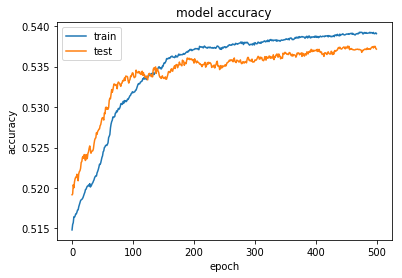

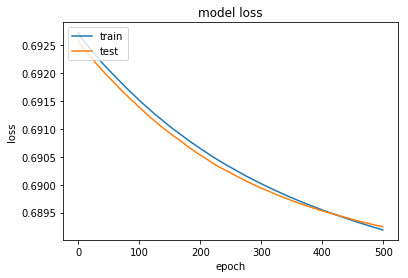

In [20]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
history

history
